In [1]:
from glacier import *
from glacier_read_data import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Spitsbergen data for E

E_values = read_ela_sb("ELA_Spitsbergen.txt")

plt.figure(figsize=(12,3), dpi=100)    
plt.plot(E_values[:,0], E_values[:,1])
plt.xlabel("Time [Year]")
plt.ylabel("E [m]")
plt.xlim(np.min(E_values[:,0]), 1.02*np.max(E_values[:,0]))
plt.show()

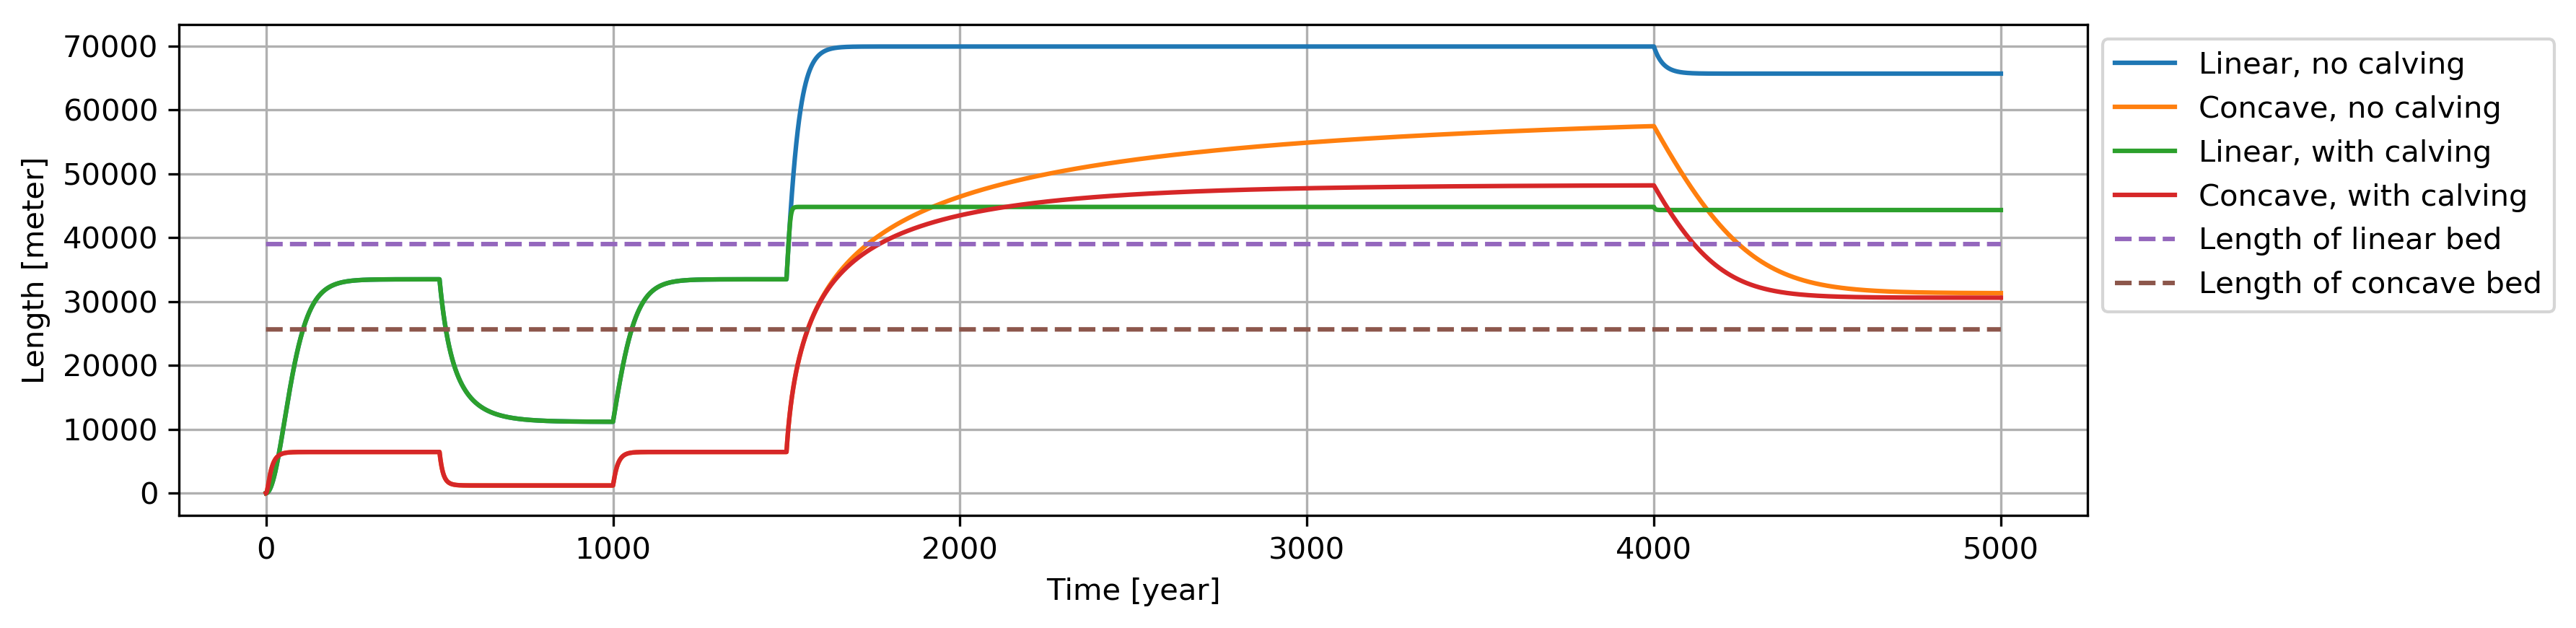

In [3]:
### Simple integrations for linear and concave beds with and without calving
# NOTE: here, lengths of the beds are different, 
# so L corresponding to calving is different for the different beds

ln = LinearBedModel(calving=False)
cn = ConcaveBedModel(calving=False)

lc = LinearBedModel(calving=True)
cc = ConcaveBedModel(calving=True)

b0 = cc.b0
ba = cc.ba
s = ln.s
xl = cc.xl

x_l_0 = b0/s
x_c_0 = - xl * np.log(-ba/b0)

dt = 0.1
t = 500.

for glacier in [ln, cn, lc, cc]:
    glacier.integrate(dt, t, 2500)
    glacier.integrate(dt, t, 3500) # stepwise change
    glacier.integrate(dt, t, 2500)
    glacier.integrate(dt, 5*t, 800)
    glacier.integrate(dt, 2*t, 1000)

plt.figure(figsize=(12,3), dpi=300)    
    
plt.plot(ln.t, ln.L, label="Linear, no calving")
plt.plot(cn.t, cn.L, label="Concave, no calving")
plt.plot(lc.t, lc.L, label="Linear, with calving")
plt.plot(cc.t, cc.L, label="Concave, with calving")

plt.plot(lc.t, len(lc.t)*[x_l_0], "--", label="Length of linear bed")
plt.plot(cc.t, len(cc.t)*[x_c_0], "--", label="Length of concave bed")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

In [ ]:
### Linear increase of E

ln = LinearBedModel(calving=False)
cn = ConcaveBedModel(calving=False)

lc = LinearBedModel(calving=True)
cc = ConcaveBedModel(calving=True)

dt = 0.1
t = 500.

for glacier in [ln, cn, lc, cc]:
    glacier.integrate(dt, 20*t, 3800, 800) # linear increase
    glacier.integrate(dt, 5*t) # constant

plt.figure(figsize=(12,3), dpi=300)   

plt.plot(ln.t, ln.L, label="Linear, no calving")
plt.plot(cn.t, cn.L, label="Concave, no calving")
plt.plot(lc.t, lc.L, label="Linear, with calving")
plt.plot(cc.t, cc.L, label="Concave, with calving")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

In [ ]:
### Glaciers with yearly varying value for E (Linear interpolated)

ln = LinearBedModel(calving=False)
cn = ConcaveBedModel(calving=False)

lc = LinearBedModel(calving=True)
cc = ConcaveBedModel(calving=True)

t = 1 #year
dt = 0.1

for glacier in [ln, cn, lc, cc]:
    glacier.t_last = E_values[0,0]
    glacier.t = np.array([E_values[0,0]], dtype=np.float)
    glacier.E = E_values[0,1]
    
    for i in range(len(E_values)-1):
        # change E after each year
        glacier.integrate(dt, t, 2*E_values[i+1,1])

plt.figure(figsize=(12,3), dpi=300)   

plt.plot(ln.t, ln.L, label="Linear, no calving")
plt.plot(cn.t, cn.L, label="Concave, no calving")
plt.plot(lc.t, lc.L, label="Linear, with calving")
plt.plot(cc.t, cc.L, label="Concave, with calving")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()